In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from autograd import elementwise_grad
from autograd import numpy as anp
import time
from autograd import grad

**Exercise 1**

In [2]:
def fp(gr_x):
    x = sy.symbols('x')
    f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    fp = f.diff(x)
    fp_np = sy.lambdify(x, fp, 'numpy')
    return fp_np(gr_x)

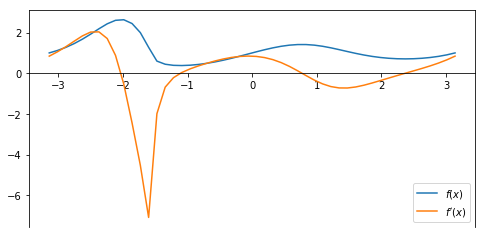

In [3]:
gr_x = np.linspace(-np.pi, np.pi)
f = lambda x: (np.sin(x) + 1) ** (np.sin(np.cos(x)))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(gr_x, f(gr_x), label='$f(x)$')
ax.plot(gr_x, fp(gr_x), label='$f\'(x)$')
ax.legend(loc=4)
ax.spines["bottom"].set_position("zero")
plt.show()

**Exercise 2**

In [4]:
def forfun1(f, x, h):
    return (f(x + h) - f(x)) / h

In [5]:
def forfun2(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

In [6]:
def backfun1(f, x, h):
    return (f(x) - f(x - h)) / h

In [7]:
def backfun2(f, x, h):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)

In [8]:
def centfun2(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

In [9]:
def centfun4(f, x, h):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

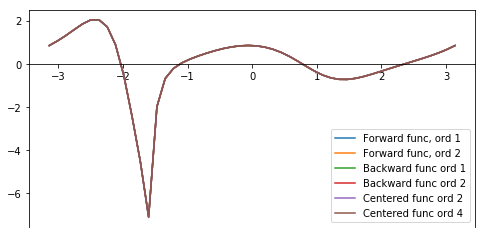

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(gr_x, forfun1(f, gr_x, 1e-3), label='Forward func, ord 1')
ax.plot(gr_x, forfun2(f, gr_x, 1e-3), label='Forward func, ord 2')
ax.plot(gr_x, backfun1(f, gr_x, 1e-3), label='Backward func ord 1')
ax.plot(gr_x, backfun2(f, gr_x, 1e-3), label='Backward func ord 2')
ax.plot(gr_x, centfun2(f, gr_x, 1e-3), label='Centered func ord 2')
ax.plot(gr_x, centfun4(f, gr_x, 1e-3), label='Centered func ord 4')
ax.legend(loc=4)
ax.spines["bottom"].set_position("zero")
plt.show()

**Exercise 3**

In [11]:
def fp_abserr(f, x_0, h, quotient):
    exact_val = fp(x_0)    
    approx_der = quotient(f, x_0, h)
    err = np.abs(exact_val - approx_der)
    return err

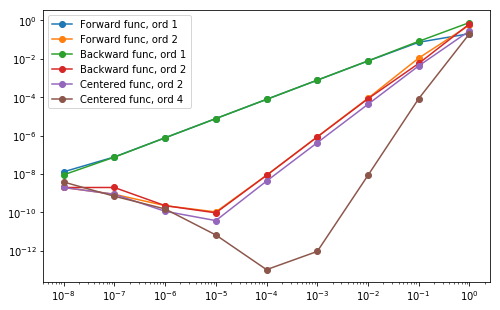

In [12]:
n = 8
h = np.logspace(-n, 0, n+1)

plt.figure(figsize=(8, 5))
plt.plot(h, fp_abserr(f, 1, h, forfun1), '-o', label='Forward func, ord 1')
plt.plot(h, fp_abserr(f, 1, h, forfun2), '-o', label='Forward func, ord 2')
plt.plot(h, fp_abserr(f, 1, h, backfun1), '-o', label='Backward func, ord 1')
plt.plot(h, fp_abserr(f, 1, h, backfun2), '-o', label='Backward func, ord 2')
plt.plot(h, fp_abserr(f, 1, h, centfun2), '-o', label='Centered func, ord 2')
plt.plot(h, fp_abserr(f, 1, h, centfun4), '-o', label='Centered func, ord 4')
plt.loglog()
plt.legend()
plt.show()

**Exercise 4**

In [13]:
plane = np.load('plane.npy')
t, α, β = plane[:, 0], plane[:, 1], plane[:, 2]
α, β = np.deg2rad(α), np.deg2rad(β)
x = (500 * np.tan(β)) / (np.tan(β) - np.tan(α))
y = (500 * (np.tan(β) * np.tan(α))) / (np.tan(β) - np.tan(α))

In [14]:
xp = np.zeros_like(t)
yp = np.zeros_like(t)

In [15]:
x

array([1311.2713366 , 1355.9364762 , 1401.91839832, 1450.49700629,
       1498.64035029, 1543.79895461, 1598.04138183, 1647.59609291])

In [16]:
x[2:]

array([1401.91839832, 1450.49700629, 1498.64035029, 1543.79895461,
       1598.04138183, 1647.59609291])

In [17]:
x[:-2]

array([1311.2713366 , 1355.9364762 , 1401.91839832, 1450.49700629,
       1498.64035029, 1543.79895461])

In [18]:
xp[0] = x[1] - x[0] # forward diff, t = 7
yp[0] = y[1] - y[0]

xp[1:-1] = (x[2:] - x[:-2]) / 2 # center diff
yp[1:-1] = (y[2:] - y[:-2]) / 2

xp[-1] = x[-1] - x[-2] # back diff, t = 14
yp[-1] = y[-1] - y[-2]

In [19]:
spd = np.sqrt(xp ** 2 + yp ** 2)
list(zip(t, spd))

[(7.0, 46.42420062213465),
 (8.0, 47.00103938095287),
 (9.0, 48.998805140367345),
 (10.0, 50.09944162965305),
 (11.0, 48.29035083820508),
 (12.0, 51.56455904927246),
 (13.0, 53.923033545053535),
 (14.0, 51.514800569635874)]

**Exercise 5**

In [20]:
def jacobian_approx(f, x_0, h):
    n = len(x_0)
    m = len(f(x_0))
    J = np.empty((m , n))
    for i in range(n):
        e = np.eye(n)[i]
        J[:, i] = (f(x_0 + h * e) - f(x_0 - h * e)) / (2 * h)
    return J

In [21]:
def f(x_vec):
    x, y = x_vec
    return np.array([x ** 2, x ** 3 - y])

In [22]:
x_vec = np.array([2, 1])
jacobian_approx(f, x_vec, 1e-6)

array([[ 4.,  0.],
       [12., -1.]])

In [23]:
x, y = sy.symbols('x'), sy.symbols('y')
fsy = sy.Matrix([x ** 2, x ** 3 - y])
fsy.jacobian([x, y])

Matrix([
[   2*x,  0],
[3*x**2, -1]])

**Exercise 6**

In [24]:
def T(x, n):
    
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
        
    return 2 * x * T(x, n - 1) - T(x, n - 2)

C:\Users\danie\AppData\Local\Continuum\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


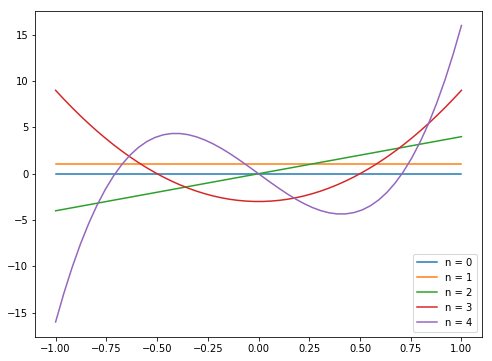

In [25]:
dg = elementwise_grad(T)
gr_x = anp.linspace(-1, 1)
gr_n = anp.arange(0, 5, 1)

plt.figure(figsize=(8, 6))
for i in gr_n:
    plt.plot(gr_x, dg(gr_x, i), label=f'n = {i}')
plt.legend()
plt.show()

**Exercise 7**

In [34]:
def exper(N):
    
    f = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))
    
    cent_err = np.zeros(N)
    autograd_err = np.zeros(N)
    timing = np.zeros(N)
    autograd_timing = np.zeros(N)
    cent_timing = np.zeros(N)
    
    for i in range(N):
        x_0 = np.random.rand()
        
        start_timing = time.time()
        exact = fp(x_0)
        timing[i] =  time.time() - start_timing
        
        cent_timing_start = time.time()
        cent_err[i] = np.abs(centfun4(f, x_0, 1e-3) - exact)
        cent_timing[i] =  time.time() - cent_timing_start
        
        df = grad(f)
        autograd_timing_start = time.time()
        autograd_err[i] = np.abs(df(x_0) - exact)
        autograd_timing[i] = time.time() - autograd_timing_start
            
    plt.figure(figsize=(8, 6))
    plt.scatter(timing, 1e-18 * np.ones(N), alpha=0.4, label='Exact, SymPy', s=50)
    plt.scatter(cent_timing, cent_err, alpha=0.4, label='Centered Difference', s=50)
    plt.scatter(autograd_timing, autograd_err, alpha=0.4, label='Autograd', s=50)
    plt.legend(loc=1)
    plt.loglog()
    plt.xlim(1e-5, 1e-1)
    plt.ylim(1e-19, 1e-11)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Absolute Error')
    plt.show()

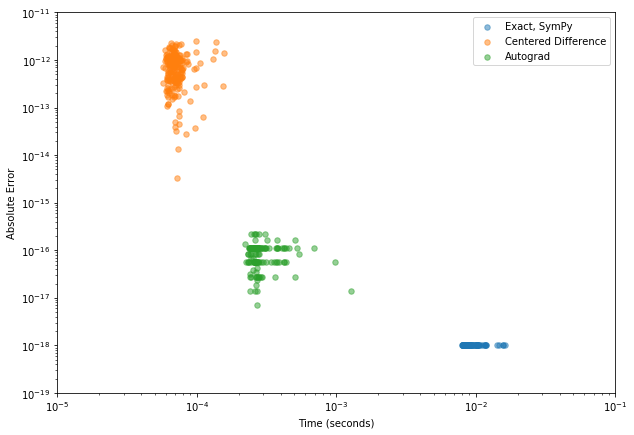

In [35]:
exper(200)